In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import latexStrings as ls
import mca

%matplotlib qt5

In [2]:
data = pd.read_csv("data/heart.data").dropna()
data.index = range(data.shape[0])
data.head()
# 297 observaciones despues de quitar nan

,age,sex,chest_pain,rest_bp,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
# Diccionarios con los nombres de categorias
sex_cat = {0 : "female", 
           1 : "male"}

chest_pain_cat = {1 : "typical angina", 
                  2 : "atypical angina",
                  3 : "non-anginal pain",
                  4 : "asymptomatic"}

# Fasting blood sugar
fbs_cat = {0 : "<= 120mg/dl",
       1 : "> 120mg/dl"}

# Rersting ECG
rest_ecg = {0 : "normal",
            1 : "ST-T wave abnormality",
            2 : "probable left ventricular hypertrophy"}

# Excercise induced angina
exang = {0 : "no",
         1 : "yes"}

# slope of peak excersice ST segment
slope = {1 : "upsloping",
         2 : "flat",
         3 : "downsloping"}

# https://www.medilexicon.com/dictionary/72223
thal = {3 : "normal",
        6 : "fixed defect",
        7 : "reversable defect"}

In [4]:
# Juntar los valores 1, 2, 3, 4 de diagnosis al nuevo valor 1 (para q diagnosis sea v o f)
data["diagnosis"] = np.where(data["diagnosis"] > 0, 1, 0)
data.head()

,age,sex,chest_pain,rest_bp,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
# Indices de vars categoricas y vars de razon
# ca (11) es categorica? numero de vessels iluminados en fluroscopia
cat_index = [1, 2, 5, 6, 8, 10, 11, 12]
num_index = [0, 3, 4, 7, 9]
data.iloc[:, cat_index].head()

,sex,chest_pain,fbs,rest_ecg,exang,slope,ca,thal
0,1.0,1.0,1.0,2.0,0.0,3.0,0.0,6.0
1,1.0,4.0,0.0,2.0,1.0,2.0,3.0,3.0
2,1.0,4.0,0.0,2.0,1.0,2.0,2.0,7.0
3,1.0,3.0,0.0,0.0,0.0,3.0,0.0,3.0
4,0.0,2.0,0.0,2.0,0.0,1.0,0.0,3.0


In [6]:
data.iloc[:, num_index].head()

,age,rest_bp,chol,thalach,oldpeak
0,63.0,145.0,233.0,150.0,2.3
1,67.0,160.0,286.0,108.0,1.5
2,67.0,120.0,229.0,129.0,2.6
3,37.0,130.0,250.0,187.0,3.5
4,41.0,130.0,204.0,172.0,1.4


In [7]:
X_num = data.iloc[:, num_index].values
X_num_std = preprocessing.scale(X_num)

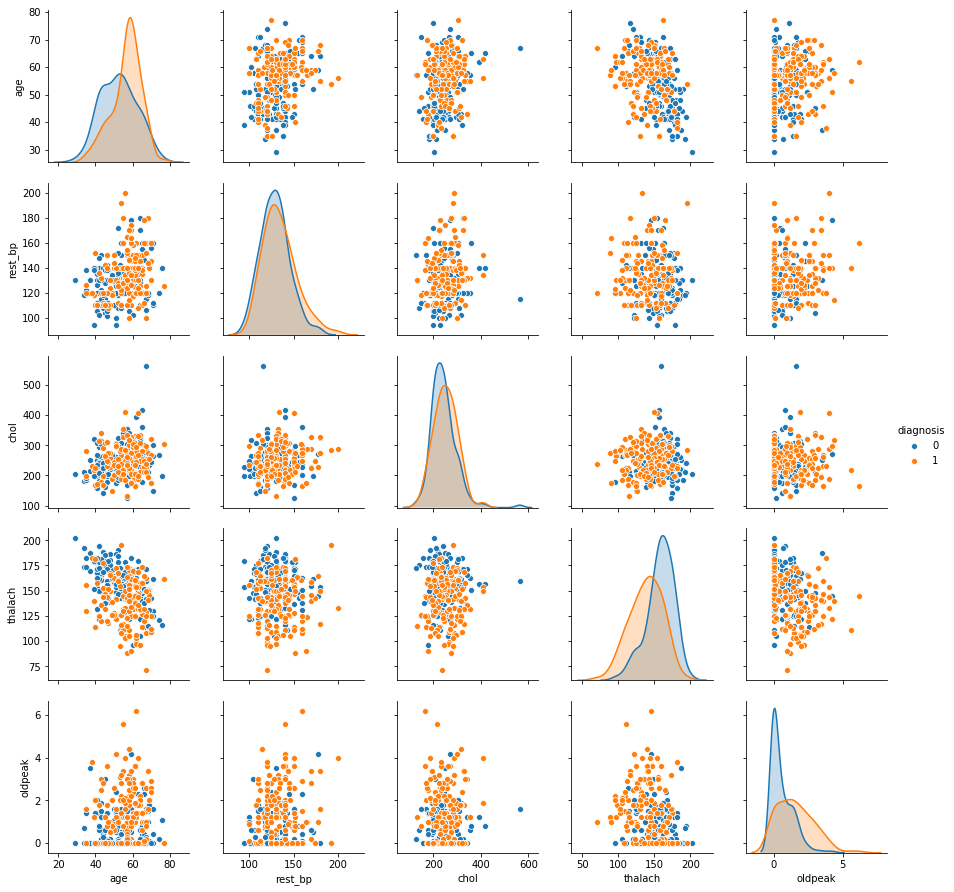

In [8]:
# histogramas para vars 
sns.pairplot(data, vars = data.columns[num_index], hue = "diagnosis")
plt.show()

In [9]:
# Tablas de contingencia de diagnosis vs vars categoricas
for att in data.columns[cat_index]:
    M = []
    print("Var = " + att )
    vals = np.unique(data[att]).astype(int)
    for val in vals:
        M.append([data.query(att + " == " + str(val) + " and diagnosis == 0").shape[0], 
                  data.query(att + " == " + str(val) + " and diagnosis == 1").shape[0]])
    print("Matriz de Contingencia: ")
    print(ls.indexedMatrix(np.array(M, dtype = int).T, ['0', '1'], vals), '\n')

Var = sex
Matriz de Contingencia: 
\begin{blockarray}{ccc}
 & 0 & 1
\begin{block}{c(cc)}
0 & 71 & 89 \\ 
1 & 25 & 112 \\ 
\end{block}
\end{blockarray} 

Var = chest_pain
Matriz de Contingencia: 
\begin{blockarray}{ccccc}
 & 1 & 2 & 3 & 4
\begin{block}{c(cccc)}
0 & 16 & 40 & 65 & 39 \\ 
1 & 7 & 9 & 18 & 103 \\ 
\end{block}
\end{blockarray} 

Var = fbs
Matriz de Contingencia: 
\begin{blockarray}{ccc}
 & 0 & 1
\begin{block}{c(cc)}
0 & 137 & 23 \\ 
1 & 117 & 20 \\ 
\end{block}
\end{blockarray} 

Var = rest_ecg
Matriz de Contingencia: 
\begin{blockarray}{cccc}
 & 0 & 1 & 2
\begin{block}{c(ccc)}
0 & 92 & 1 & 67 \\ 
1 & 55 & 3 & 79 \\ 
\end{block}
\end{blockarray} 

Var = exang
Matriz de Contingencia: 
\begin{blockarray}{ccc}
 & 0 & 1
\begin{block}{c(cc)}
0 & 137 & 23 \\ 
1 & 63 & 74 \\ 
\end{block}
\end{blockarray} 

Var = slope
Matriz de Contingencia: 
\begin{blockarray}{cccc}
 & 1 & 2 & 3
\begin{block}{c(ccc)}
0 & 103 & 48 & 9 \\ 
1 & 36 & 89 & 12 \\ 
\end{block}
\end{blockarray} 

Var = c

In [10]:
# MCA
labels = ['sex', 'chest_pain', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal']
mca_ben = mca.MCA(data, cols = labels)

In [11]:
mca_ben.L

array([0.03560743, 0.00199655, 0.00141772, 0.00046124, 0.00023844])

In [12]:
mca_ben.expl_var(greenacre=True, N=5)

array([0.70934877, 0.03977402, 0.02824292, 0.00918853, 0.00474995])

In [13]:
multi = [[], []]
for l in labels:
    for val in np.unique(data[l]).astype(int):
        multi[0] += [l]
        multi[1] += [str(val)]

mca_c_df = pd.DataFrame(data = mca_ben.fs_c(N=5), columns = ["Factor 1", "Factor 2", "Factor 3", "Factor 4", "Factor 5"],
                        index = multi)
mca_c_df

Factor 1  Factor 2  Factor 3  Factor 4  Factor 5
sex        0 -0.201002  0.030414  0.078426 -0.021534 -0.022564
           1  0.096001 -0.014526 -0.037457  0.010285  0.010777
chest_pain 1 -0.017422 -0.182367 -0.068036 -0.043623  0.003457
           2 -0.347495  0.014910 -0.048723 -0.033033  0.027892
           3 -0.214006 -0.013944  0.030260  0.057883 -0.016284
           4  0.247820  0.032543  0.010146 -0.015369 -0.000667
fbs        0 -0.012846  0.027544  0.002278 -0.005175  0.006918
           1  0.075880 -0.162704 -0.013458  0.030570 -0.040866
rest_ecg   0 -0.094105  0.026514 -0.024055  0.001851  0.010439
           1  0.262997  0.018675  0.530828 -0.010281  0.114168
           2  0.087544 -0.027208  0.009677 -0.001582 -0.013639
exang      0 -0.164206 -0.019440 -0.000668  0.003749 -0.000972
           1  0.338568  0.040083  0.001376 -0.007730  0.002003
slope      1 -0.210826  0.007602 -0.036985  0.001844 -0.001525
           2  0.188908  0.022850  0.029409 -0.001903 -0.007310
           3  0.163072 -0.199383  0.052944  0.000208  0.057778
ca         0 -0.148325 -0.007602  0.004356 -0.007694  0.012810
           1  0.146306  0.062595 -0.025086  0.044939 -0.006077
           2  0.262203 -0.038950 -0.030460 -0.081223 -0.051627
           3  0.316745 -0.063290  0.101502  0.075206  0.006392
thal       3 -0.229768  0.004765  0.019351 -0.006825 -0.006832
           6  0.362124 -0.171315  0.063052 -0.035949  0.043818
           7  0.270988  0.020020 -0.037465  0.015360  0.002885

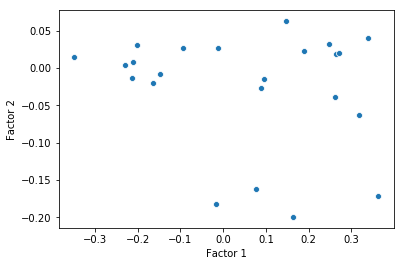

In [14]:
# plot columnas
# mayb hacer un mejor plot, dando figura a cada atributo y diferentes colores por valor
sns.scatterplot(x = "Factor 1", y = "Factor 2", data = mca_c_df)
plt.show()

In [15]:
mca_r_df = pd.DataFrame(data = mca_ben.fs_r(N=5), columns = ["Factor 1", "Factor 2", "Factor 3", "Factor 4", "Factor 5"])

mca_r_df["diagnosis"] = data["diagnosis"]
mca_r_df

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,diagnosis
0,0.105517,-0.242090,0.003274,-0.014516,0.024573,0
1,0.239726,0.007024,0.042864,0.015463,-0.000792,1
2,0.343281,0.019241,-0.016511,-0.028790,-0.017014,1
3,-0.140215,-0.060502,0.014786,0.017894,0.025067,0
4,-0.284738,0.009561,0.008716,-0.023157,0.000702,0
5,-0.257967,0.012271,-0.038341,-0.011537,0.019987,0
6,0.035465,-0.058541,0.044567,-0.042112,-0.010615,1
7,-0.072055,0.049946,0.017265,-0.019987,0.000196,0
8,0.199704,0.032209,-0.015464,0.016582,-0.002715,1
9,0.262603,-0.098366,-0.003108,0.007927,0.010439,1


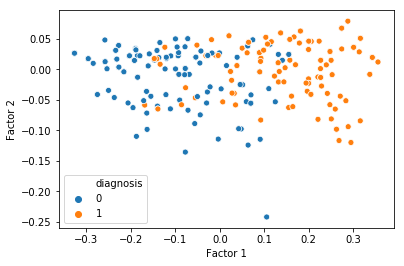

In [16]:
# plot de renglones
sns.scatterplot(x = "Factor 1", y = "Factor 2", data = mca_r_df, hue = "diagnosis")
plt.show()

In [21]:
X = data.iloc[:, cat_index].values

In [30]:
x = [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0]

In [42]:
mca_ben.fs_r(N=2)

array([[ 0.10551674, -0.24209005],
       [ 0.23972648,  0.00702358],
       [ 0.34328134,  0.01924133],
       [-0.14021517, -0.06050244],
       [-0.28473754,  0.00956113],
       [-0.25796671,  0.0122712 ],
       [ 0.03546517, -0.05854105],
       [-0.07205512,  0.04994649],
       [ 0.19970377,  0.03220857],
       [ 0.26260345, -0.09836626],
       [ 0.11032172, -0.03191627],
       [-0.19196947,  0.01426619],
       [ 0.25094777, -0.08151548],
       [-0.14175409,  0.0169785 ],
       [-0.09018374, -0.05063078],
       [-0.22698737,  0.0033676 ],
       [-0.05498189, -0.04689154],
       [-0.11980922,  0.01771224],
       [-0.29591416,  0.01723473],
       [-0.25796671,  0.0122712 ],
       [ 0.07023962, -0.04210859],
       [-0.18754512, -0.11001932],
       [-0.12304268,  0.00039906],
       [ 0.02665423, -0.01817549],
       [ 0.34328134,  0.01924133],
       [-0.20314609,  0.02193979],
       [-0.29591416,  0.01723473],
       [-0.16351988, -0.09860647],
       [-0.11980922,

In [41]:
np.dot(x, mca_ben.fs_c(N=2))

array([1.03297252, 0.02276143])